# Payment Behaviour

In [12]:
# -------------------------------------------------------------------
# Setup cell — place this at the top of every analysis notebook
# -------------------------------------------------------------------
# Core libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic

df = pd.read_csv("../datasets/customer_shopping_data_v5.csv")
sns.set_theme(style="whitegrid")

color1 = '#FF9E9D'  # Coral Pink
color2 = '#FFC785'  # Peach
color3 = '#FFF59D'  # Light Lemon
color4 = '#A0E6A6'  # Mint Green
color5 = '#87C8FF'  # Sky Blue
color6 = '#C4A2FF'  # Lavender

1. payment_method ↔ invoice_date <br>
What are the trends in payment method shares over time?

2. payment_method ↔ gender <br>
How does payment method preference vary by gender?

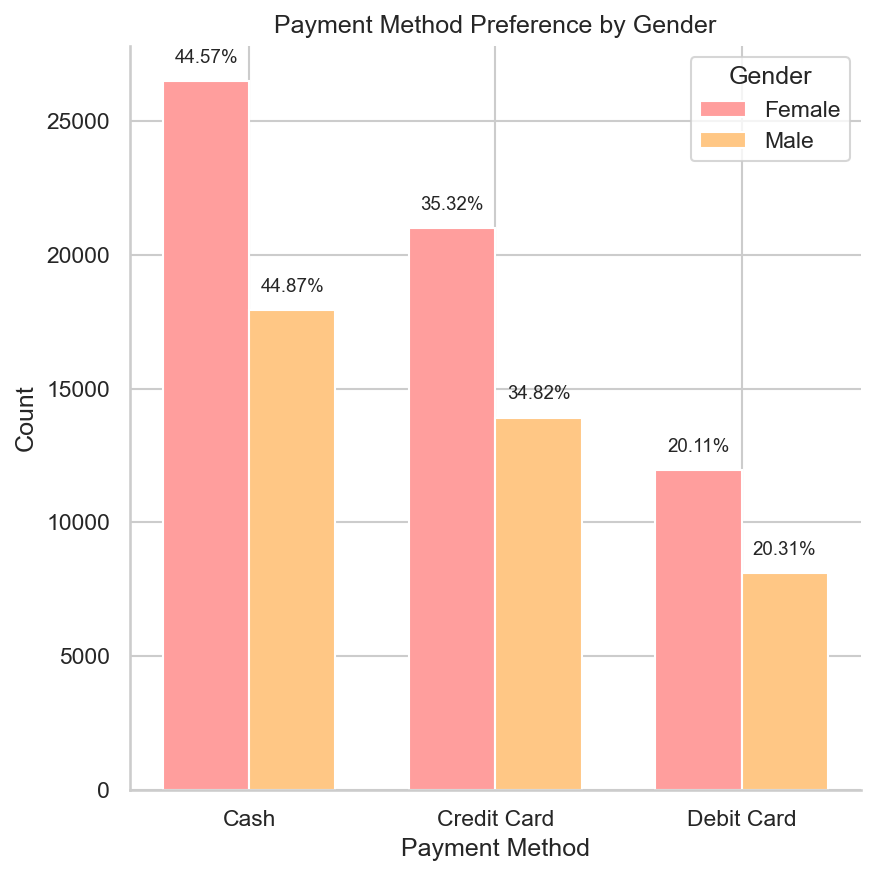


Observed counts:
gender          Female   Male
payment_method               
Cash             26509  17938
Credit Card      21011  13920
Debit Card       11962   8117

Expected counts under H0:
gender            Female      Male
payment_method                    
Cash            26582.31  17864.69
Credit Card     20891.10  14039.90
Debit Card      12008.60   8070.40
χ² = 2.6650  (df=2)   p-value = 0.2638
p = 0.2638 ≥ 0.05  →  Fail to reject H₀.
• Conclusion: No statistically significant association between gender and payment-method preference at the 95 % confidence level.


In [13]:
# -------------------------------------------------------------------
# Gender ↔ Payment Method  ─ grouped bars with count + % label
# -------------------------------------------------------------------
# Three payment methods on X-axis; for her/him bars side-by-side.
# Each bar shows the absolute count (height) and the share within
# that gender (text), rounded to 4 decimals.
# -------------------------------------------------------------------

# define two fixed colors for gender bars
gender_colors = {"Female": color1, 
                 "Male": color2}

# contingency table (rows = payment, cols = gender)
ct = pd.crosstab(df["payment_method"], df["gender"])

# total shoppers per gender → % share = count / gender_total
gender_tot = df["gender"].value_counts()
pct = ct.divide(gender_tot, axis=1) * 100  # percentage matrix

methods   = ct.index.tolist()
genders   = ct.columns.tolist()
x         = np.arange(len(methods)) 
width     = 0.35

fig, ax = plt.subplots(figsize=(6, 6), dpi=150)

for i, g in enumerate(genders):
    counts = ct[g].values
    ax.bar(x + i*width - width/2, counts,
           width=width, label=g, color =gender_colors[g])

    # annotate each bar with "count  (xx.xx %)"
    for j, c in enumerate(counts):
        perc = pct.iloc[j, i]
        ax.text(x[j] + i*width - width/2,
                c + max(ct.values.max()*0.02, 1),
                f"{perc:.2f}%",
                ha="center", va="bottom", fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.set_ylabel("Count")
ax.set_xlabel("Payment Method")
ax.set_title("Payment Method Preference by Gender")
ax.legend(title="Gender")
sns.despine()
plt.tight_layout()
plt.savefig("dataset_payment_behavior_figures/payment_gender_2.png", dpi=150)
plt.show()

# χ² test
chi2, p, dof, exp = stats.chi2_contingency(ct)

# Convert expected array to DataFrame with same labels
expected_df = pd.DataFrame(exp, index=ct.index, columns=ct.columns)

print("\nObserved counts:")
print(ct)

print("\nExpected counts under H0:")
print(expected_df.round(2))   # round to 2 decimals


print(f"χ² = {chi2:.4f}  (df={dof})   p-value = {p:.4f}")

# Interpretation (α = 0.05 ⇒ 95 % confidence level)
alpha = 0.05
if p < alpha:
    print(f"p = {p:.4f} < {alpha}  →  Reject H₀.")
    print("• Conclusion: Payment-method preference differs significantly by gender at the 95 % confidence level.")
else:
    print(f"p = {p:.4f} ≥ {alpha}  →  Fail to reject H₀.")
    print("• Conclusion: No statistically significant association between gender and payment-method preference at the 95 % confidence level.")


3. payment_method ↔ Econ_Conf_level <br>
Does card usage increase when consumer confidence declines?

4. payment_method ↔ category <br>
Does payment method choice differ by product category?

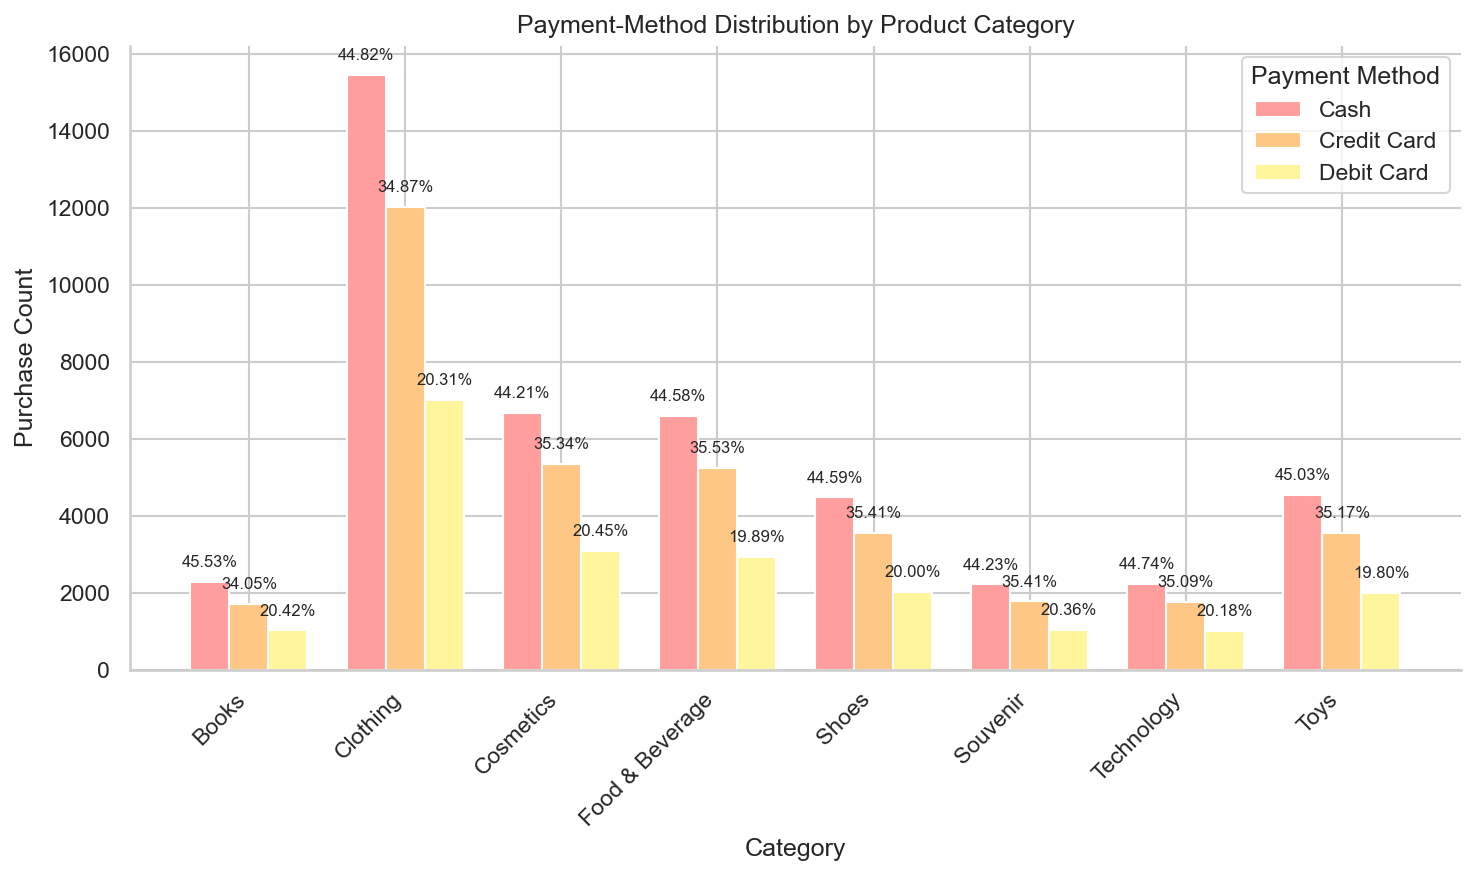


Observed counts:
payment_method    Cash  Credit Card  Debit Card
category                                       
Books             2268         1696        1017
Clothing         15456        12025        7006
Cosmetics         6674         5336        3087
Food & Beverage   6587         5250        2939
Shoes             4474         3553        2007
Souvenir          2211         1770        1018
Technology        2235         1753        1008
Toys              4542         3548        1997

Expected counts under H0:
payment_method       Cash  Credit Card  Debit Card
category                                          
Books             2225.99      1749.41     1005.60
Clothing         15412.12     12112.42     6962.45
Cosmetics         6746.80      5302.32     3047.88
Food & Beverage   6603.34      5189.58     2983.07
Shoes             4484.16      3524.11     2025.73
Souvenir          2234.04      1755.73     1009.23
Technology        2232.70      1754.68     1008.62
Toys            

In [14]:
# ╔══════════════════════════════════════════════════════════════╗
# ║ ANALYSIS: Does payment-method choice differ by product       ║
# ║          category?                                           ║
# ║ • Visual: For every category we draw exactly three bars—     ║
# ║   Cash, Credit-Card, Debit-Card—side-by-side.                ║
# ║ • Bars are annotated with count and the share (%) inside     ║
# ║   that category, rounded to 4 decimals.                      ║
# ║ • Test: χ² independence                                      ║
# ╚══════════════════════════════════════════════════════════════╝

# contingency table  rows = category   cols = payment method
ct = pd.crosstab(df["category"], df["payment_method"])

cats    = ct.index.tolist()
methods = ["Cash", "Credit Card", "Debit Card"]   # fixed order
x       = np.arange(len(cats))
width   = 0.25

method_colors = {"Cash": color1,      
                 "Credit Card": color2, 
                 "Debit Card": color3}  

fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

for i, m in enumerate(methods):
    counts = ct[m].values
    bar_pos = x + (i - 1) * width          # centres the trio on each tick
    ax.bar(bar_pos, counts,
           width=width,
           color=method_colors[m],
           label=m)

    # annotate: count + percentage within the category
    pct = (counts / ct.sum(axis=1).values) * 100
    for j, (c, pcent) in enumerate(zip(counts, pct)):
        ax.text(bar_pos[j],
                c + max(ct.values.max()*0.02, 1),
                f"{pcent:.2f}%",
                ha="center", va="bottom", fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(cats, rotation=45, ha="right")
ax.set_ylabel("Purchase Count")
ax.set_xlabel("Category")
ax.set_title("Payment-Method Distribution by Product Category")
ax.legend(title="Payment Method")
sns.despine()
plt.tight_layout()
plt.savefig("dataset_payment_behavior_figures/payment_category_4.png", dpi=150)
plt.show()

# χ² test of independence
chi2, p, dof, exp = stats.chi2_contingency(ct)

# Convert expected array to DataFrame with same labels
expected_df = pd.DataFrame(exp, index=ct.index, columns=ct.columns)

print("\nObserved counts:")
print(ct)

print("\nExpected counts under H0:")
print(expected_df.round(2))   # round to 2 decimals


print(f"χ² = {chi2:.4f}  (df = {dof})   p-value = {p:.4f}")

alpha = 0.05
if p < alpha:
    print("At the 95 % confidence level, product category does influence payment-method choice.")
else:
    print("At the 95 % confidence level, there is no statistically significant association between product category and payment-method choice.")


5. payment_method ↔ basket_total_price <br>
Which payment methods are used for high-value baskets?

6. credit_card_share ↔ Econ_Conf (lag 0/+1) <br>
How does the credit card usage rate respond to changes in the consumer confidence index?